# Connect to Kaggle

In [ ]:
import pandas as pd
import numpy as np

# Part I EDA

In [ ]:
import pandas as pd

data = pd.read_csv("list_attr_celeba.csv")
data = data.replace(-1, 0)

In [ ]:
data

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1


In [ ]:
import scipy.stats as ss

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [ ]:
import numpy as np

cor_matrix = []
for i in range(1, len(data.columns)):
    cor_list = []
    for j in range(1, len(data.columns)):
        confusion_matrix = pd.crosstab(data.iloc[:,i], data.iloc[:,j]).values
        cor_list.append(format(round(cramers_v(confusion_matrix),2), ".2f"))
    cor_matrix.append(cor_list)

<AxesSubplot:>

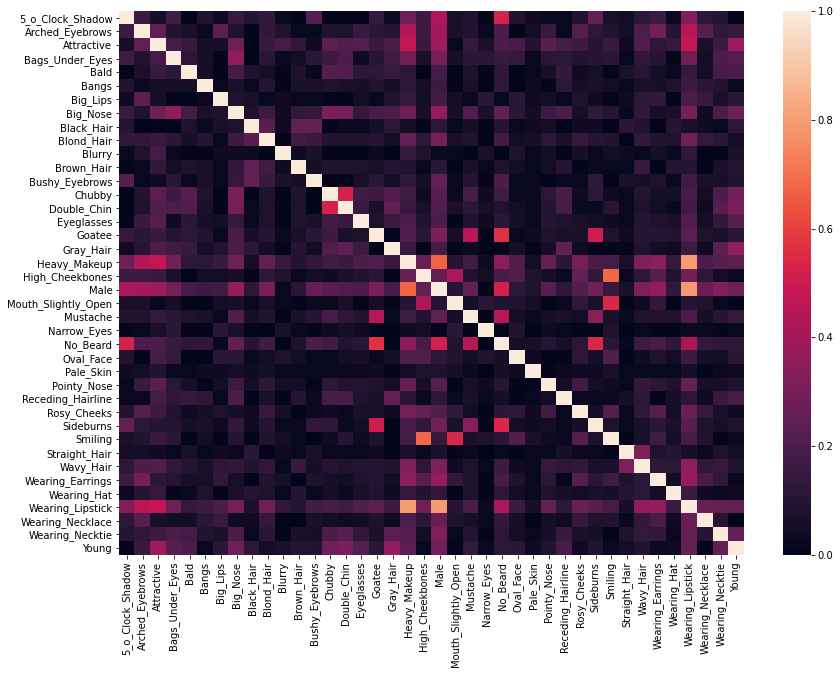

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_matrix = pd.DataFrame(cor_matrix).apply(pd.to_numeric, errors='coerce')
cor_matrix.columns = data.columns[1:len(data.columns)]
cor_matrix.index = data.columns[1:len(data.columns)]

plt.figure(figsize=(14, 10))
sns.heatmap(cor_matrix)

In [ ]:
for i in range(1, len(cor_matrix.columns)):
    if sum(((cor_matrix > 0.4) & (cor_matrix != 1)).iloc[:,i]) == 0:
        pass
    else:
        print(cor_matrix.iloc[:,i][((cor_matrix > 0.4) & (cor_matrix != 1)).iloc[:,i]])
        print("\n")

Heavy_Makeup        0.44
Male                0.41
Wearing_Lipstick    0.46
Name: Arched_Eyebrows, dtype: float64


Heavy_Makeup        0.48
Wearing_Lipstick    0.48
Name: Attractive, dtype: float64


Double_Chin    0.53
Name: Chubby, dtype: float64


Chubby    0.53
Name: Double_Chin, dtype: float64


Mustache     0.45
No_Beard     0.57
Sideburns    0.51
Name: Goatee, dtype: float64


Arched_Eyebrows     0.44
Attractive          0.48
Male                0.67
Wearing_Lipstick    0.80
Name: Heavy_Makeup, dtype: float64


Mouth_Slightly_Open    0.42
Smiling                0.68
Name: High_Cheekbones, dtype: float64


5_o_Clock_Shadow    0.42
Arched_Eyebrows     0.41
Heavy_Makeup        0.67
No_Beard            0.52
Wearing_Lipstick    0.79
Name: Male, dtype: float64


High_Cheekbones    0.42
Smiling            0.54
Name: Mouth_Slightly_Open, dtype: float64


Goatee      0.45
No_Beard    0.45
Name: Mustache, dtype: float64


5_o_Clock_Shadow    0.53
Goatee              0.57
Male             

In [ ]:
diff_list = []
for i in range(1, len(data.columns)):  
    diff_list.append(abs(data.iloc[:,i].value_counts()[1]-data.iloc[:,i].value_counts()[0])/len(data))
diff_df = pd.DataFrame(diff_list, data.columns[1:]).reset_index()
diff_df.columns = ['index', 'value']

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


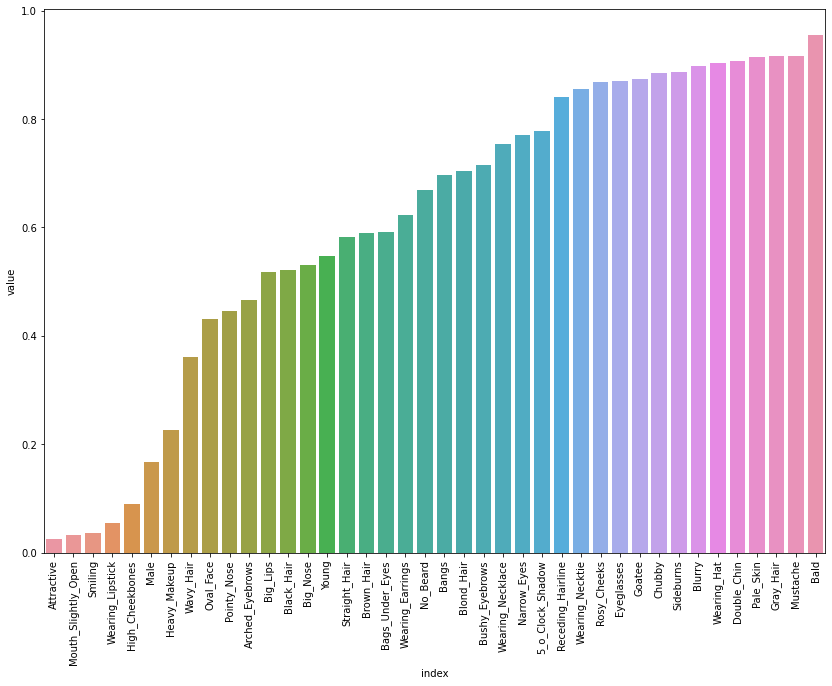

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot('index', 'value', data = diff_df.sort_values('value'))
plt.xticks(rotation=90)
plt.show()

In [ ]:
diff_df[diff_df.value > 0.8].sort_values('value')

,index,value
28,Receding_Hairline,0.840443
38,Wearing_Necktie,0.854570
29,Rosy_Cheeks,0.868558
15,Eyeglasses,0.869762
16,Goatee,0.874471
13,Chubby,0.884866
30,Sideburns,0.886979
10,Blurry,0.898203
35,Wearing_Hat,0.903079
14,Double_Chin,0.906623


# PART II Prepare Data for Modeling

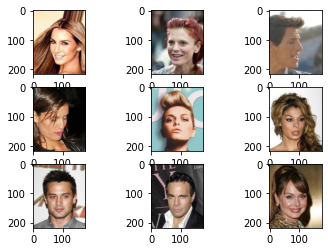

In [ ]:
from matplotlib.image import imread

folder = 'img_align_celeba/img_align_celeba/'

for i in range(1, 10):
    # define subplot
    plt.subplot(330 + i)
    # define filename
    filename = folder + str(i).zfill(6) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [ ]:
from os import listdir
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray

photos, targets = list(), list()
path = 'img_align_celeba/img_align_celeba/'
for filename in listdir(folder)[1000:2000]:
    photo = load_img(path + filename, target_size=(128,128))
    photo = img_to_array(photo, dtype='uint8')
    photos.append(photo)
    targets.append(asarray(data[data.image_id == filename].iloc[:,1:]))
X = asarray(photos, dtype='uint8')
y = asarray(targets, dtype='uint8')
y = y.reshape(1000,40)

In [ ]:
print(X.shape)
print(y.shape)

(1000, 128, 128, 3)
(1000, 40)


# PART III Construct The CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
def fbeta(y_true, y_pred, beta=2):
    # clip predictions
    y_pred = backend.clip(y_pred, 0, 1)
    # calculate elements
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    # calculate precision
    p = tp / (tp + fp + backend.epsilon())
    # calculate recall
    r = tp / (tp + fn + backend.epsilon())
    # calculate fbeta, averaged across each class
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score

In [ ]:
# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=40):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(out_shape, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    return model

model = define_model()

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow(trainX, trainY, batch_size=20)
test_it = datagen.flow(testX, testY, batch_size=20)

In [ ]:
from tensorflow.keras import backend

history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=30)

Epoch 1/30
35/35 [==============================] - 19s 526ms/step - loss: 0.6268 - fbeta: 0.3985 - val_loss: 0.5196 - val_fbeta: 0.3711
Epoch 2/30
35/35 [==============================] - 20s 584ms/step - loss: 0.5043 - fbeta: 0.3831 - val_loss: 0.4999 - val_fbeta: 0.3360
Epoch 3/30
35/35 [==============================] - 20s 567ms/step - loss: 0.4731 - fbeta: 0.3739 - val_loss: 0.4850 - val_fbeta: 0.3723
Epoch 4/30
35/35 [==============================] - 19s 555ms/step - loss: 0.4647 - fbeta: 0.3748 - val_loss: 0.4840 - val_fbeta: 0.4153
Epoch 5/30
35/35 [==============================] - 19s 556ms/step - loss: 0.4665 - fbeta: 0.3646 - val_loss: 0.4750 - val_fbeta: 0.4225
Epoch 6/30
35/35 [==============================] - 19s 534ms/step - loss: 0.4497 - fbeta: 0.4030 - val_loss: 0.4813 - val_fbeta: 0.3927
Epoch 7/30
35/35 [==============================] - 19s 531ms/step - loss: 0.4455 - fbeta: 0.3858 - val_loss: 0.4660 - val_fbeta: 0.3779
Epoch 8/30
35/35 [=======================

In [ ]:

# evaluate model
loss, fbeta = model.evaluate_generator(test_it, steps=len(test_it))
print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> loss=0.358, fbeta=0.545


In [ ]:
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Fbeta')
    plt.plot(history.history['fbeta'], color='blue', label='train')
    plt.plot(history.history['val_fbeta'], color='orange', label='test')
    plt.show()

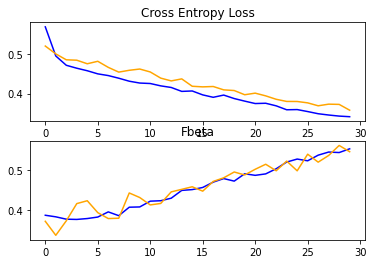

In [ ]:
summarize_diagnostics(history)